<a href="https://colab.research.google.com/github/AnastasiaKazanas/ANN-Final-Project/blob/main/Bert_LR/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [1]:
!git clone https://github.com/AnastasiaKazanas/ANN-Final-Project.git

Cloning into 'ANN-Final-Project'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 381 (delta 125), reused 191 (delta 100), pack-reused 85 (from 1)
Receiving objects: 100% (381/381), 61.64 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (172/172), done.
Filtering content: 100% (4/4), 435.85 MiB | 38.07 MiB/s, done.


In [3]:
file_path = '/content/ANN-Final-Project/Bert_embeding_datasets/Fake_News_Classification.h5'

with h5py.File(file_path, 'r') as f:
    input_ids = np.array(f['input_ids'])
    attention_masks = np.array(f['attention_mask'])
    labels = np.array(f['labels'])
    ## cant load in texts it causes code to crash

# Combine input_ids and attention_masks as features
features = np.concatenate([input_ids, attention_masks], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=200, solver='saga', penalty='l2', C=1.0)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, solver='saga')


Model Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.64      0.67      6871
        True       0.60      0.66      0.63      5618

    accuracy                           0.65     12489
   macro avg       0.65      0.65      0.65     12489
weighted avg       0.66      0.65      0.65     12489



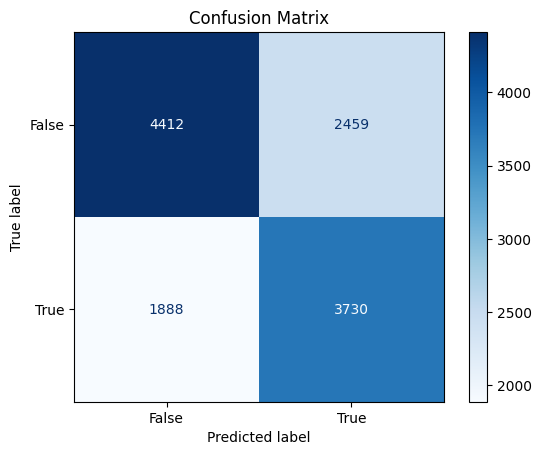

In [4]:
# Evaluate the Model
predictions = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['False', 'True']))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['False', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()